## PGM@UDEM - HOMEWORK 1 - QUESTION 4 - SALEM LAHLOU - FALL 2018

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.stats import gamma

In [2]:
MU, SIGMA_SQUARED = 0, 1

### a) 

In [3]:
X = np.sqrt(SIGMA_SQUARED) * np.random.randn(5) + MU
print("The sample is: {}".format(X))

The sample is: [ 0.03407968 -0.46880893  0.51360778 -0.52178948  0.12467484]


### b)

In [4]:
def MLE(X):
    '''
    X is an array of n elements: observations of the random process used to estimate the MLE mean/variance
    '''
    X_bar = np.mean(X)
    mu_hat = X_bar
    sigma_squared_hat = np.mean((X - X_bar)**2)
    return mu_hat, sigma_squared_hat

In [5]:
mu_hat, sigma_squared_hat = MLE(X)
print("mu_hat = {}, sigma_squared_hat = {}".format(mu_hat, sigma_squared_hat))

mu_hat = -0.06364722084360139, sigma_squared_hat = 0.15045788485876638


### c)

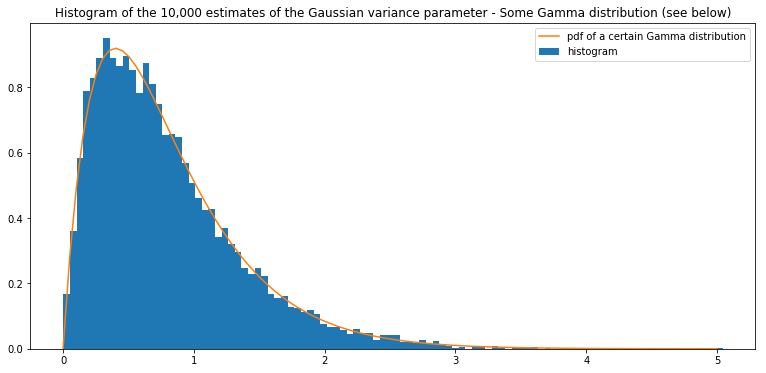

In [7]:
N = 10000
variances_estimates = np.zeros(N)

for i in range(N):
    X = np.sqrt(SIGMA_SQUARED) * np.random.randn(5) + MU
    mu_hat, sigma_squared_hat = MLE(X)
    variances_estimates[i] = sigma_squared_hat

plt.hist(variances_estimates, bins=100, density=True, label='histogram')

def gamma_pdf(x, n=5):
    a = (n - 1)/2.
    scale = 2. * SIGMA_SQUARED/n
    return gamma.pdf(x, a, scale=scale)

plt.plot(np.linspace(0, 5, 100), [gamma_pdf(x, n=5) for x in np.linspace(0, 5, 100)], label='pdf of a certain Gamma distribution')

plt.legend()
plt.title("Histogram of the 10,000 estimates of the Gaussian variance parameter - Some Gamma distribution (see below)")
plt.rcParams['figure.figsize'] = (13, 6)
plt.show()

The variance estimator is $\hat{\sigma}^2 = \frac{\sigma^2}{n} \frac{1}{\sigma^2} \sum_{i=1}^n (X_i - \bar{X})^2$. It is distributed along a $\chi^2_{n-1}$ distribution **scaled by** $\frac{\sigma^2}{n}$. Because $\chi^2_{n-1} = \Gamma(k=\frac{n-1}{2}, \theta=2)$, then $\hat{\sigma}^2 \sim \Gamma(k=\frac{n-1}{2}, \theta=2 \frac{\sigma^2}{n}$). This explains why the histogram matches the pdf of the Gamma distribution defined above.

### d)

In [8]:
bias = np.mean(variances_estimates) - SIGMA_SQUARED
variance = np.var(variances_estimates)
print("The empirical bias of the estimator is: {}\nThe empirical variance of the estimator is: {}".format(bias, variance))

The empirical bias of the estimator is: -0.20369641145368433
The empirical variance of the estimator is: 0.3172446144024871


### e)

The theoretical value of the bias of the estimator obtained in 3(d) is $-\frac{1}{n} \sigma^2$.

The theoretical value of the variance of the estimator obtained in 3(d) is $\frac{2(n-1)\sigma^4}{n^2}$

In [9]:
def theoretical_bias(n=5):
    return -1./n * SIGMA_SQUARED
def theoretical_variance(n=5):
    return 2. * (n-1) * SIGMA_SQUARED ** 2/ n**2 
print("The theoretical values of the bias and variance, with n=5 are are {} and {}".format(theoretical_bias(5), theoretical_variance(5)))
print("Matches the emirical values of the previous question. Isn't it great ?")      

The theoretical values of the bias and variance, with n=5 are are -0.2 and 0.32
Matches the emirical values of the previous question. Isn't it great ?
